In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.multitest as multitest
import tqdm

In [30]:
def perform_t_tests(group1_vals, group2_vals, delta):
    mean1 = np.mean(group1_vals)
    mean2 = np.mean(group2_vals)
    
    # perform standard t-test (testing for difference)
    # consider switching to Welch's t-test (current assumes equal variances)
    diff_pval = stats.ttest_ind(a=group1_vals, b = group2_vals).pvalue

    # get t statistics for equivalence test
    # (X1 - X2 - delta)/sqrt(s1^2/n1 + s2^2/n2)
    t1 = (np.mean(group1_vals) - np.mean(group2_vals) - delta)/np.sqrt(np.var(group1_vals)/len(group1_vals)+np.var(group2_vals)/len(group2_vals))

    # (X1 - X2 + delta)/sqrt(s1^2/n1 + s2^2/n2)
    t2 = (np.mean(group1_vals) - np.mean(group2_vals) + delta)/np.sqrt(np.var(group1_vals)/len(group1_vals)+np.var(group2_vals)/len(group2_vals))

    # find degrees of freedom (n1 + n2 - 1)
    df = len(group1_vals) + len(group2_vals)

    # find p value for t1 (less than)
    p1 = stats.t.cdf(t1, df)

    # find p value for t2 (greater than)
    # sf is survival function: 1 - cdf
    p2 = stats.t.sf(t2, df)

    equiv_pval = np.max([p1, p2])
    print("diff pvalue: {}\nequiv pvalue: {}".format(diff_pval, equiv_pval))
    return diff_pval, equiv_pval

def plot_groups(group1_vals, group2_vals):
    mean1 = np.mean(group1_vals)
    mean2 = np.mean(group2_vals)
    plt.hist(group1_vals,alpha=0.4, color=u'#1f77b4')
    plt.axvline(x=mean1, color=u'#1f77b4',linestyle="--")
    plt.hist(group2_vals,alpha = 0.4, color = u'#ff7f0e')
    plt.axvline(x=mean2, color=u'#ff7f0e',linestyle="--")
    # plt.axvline(x=np.mean(group2_vals), color="black")
    plt.title("difference in means: {:.3f}".format(mean1 - mean2))
    plt.show()

In [31]:
csv_path = "/exports/home/jolivieri/equivalence_testing/notebooks/output/sample_tabular_data/HLCA_normal_1000_CD4-positive-alpha-beta-T-cell_CD8-positive-alpha-beta-T-cell_1000_100.csv"
df = pd.read_csv(csv_path, index_col = 0)

  0%|          | 0/100 [00:00<?, ?it/s]

diff pvalue: 0.9581135871456463
equiv pvalue: 2.386603227129333e-36
diff pvalue: 0.41324570096030655
equiv pvalue: 1.0198214051322966e-07
diff pvalue: 0.5442822344976448
equiv pvalue: 8.313905589351264e-08
diff pvalue: 0.033776782316633266
equiv pvalue: 0.0419469394848459
TMEM258


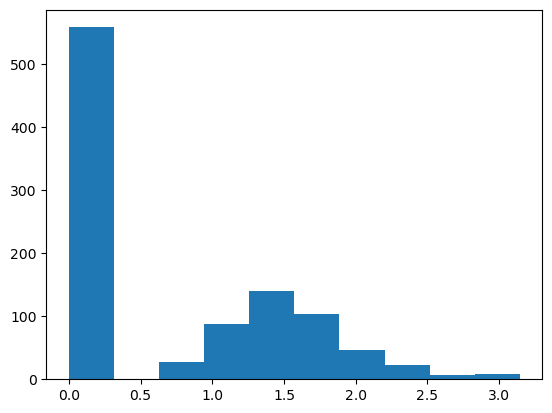

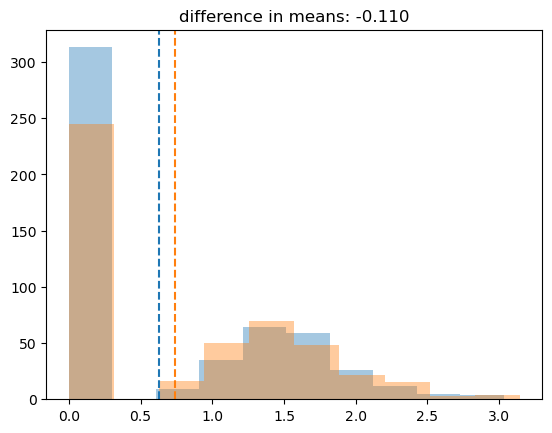

  4%|▍         | 4/100 [00:00<00:11,  8.26it/s]

diff pvalue: 0.9572965827111757
equiv pvalue: 1.1295859029934387e-46
diff pvalue: 0.10057789614411865
equiv pvalue: 3.351376547844142e-13
diff pvalue: 0.1667936037317629
equiv pvalue: 1.477126898636105e-09
diff pvalue: 0.14901840660006932
equiv pvalue: 1.8510725369670348e-20
diff pvalue: 0.06659661972496733
equiv pvalue: 4.750536006793289e-14
diff pvalue: 0.8910036660534792
equiv pvalue: 5.1852241935180937e-42
diff pvalue: 0.6304633422642887
equiv pvalue: 7.969515462753908e-21
diff pvalue: 0.19715063859288584
equiv pvalue: 2.8188882104643528e-09
diff pvalue: 0.9996224892729254
equiv pvalue: 3.186175913245011e-12
diff pvalue: 0.3830591901651089
equiv pvalue: 0.0006720350317590008
diff pvalue: 0.10466814043102728
equiv pvalue: 1.1515962738717367e-07
diff pvalue: 0.1815990460193468
equiv pvalue: 1.9164951245116832e-21
diff pvalue: 0.6327711418121407
equiv pvalue: 4.4269051785736554e-13
diff pvalue: 0.3477063477620622
equiv pvalue: 5.302709140258957e-09
diff pvalue: 0.08013706986013458
equ

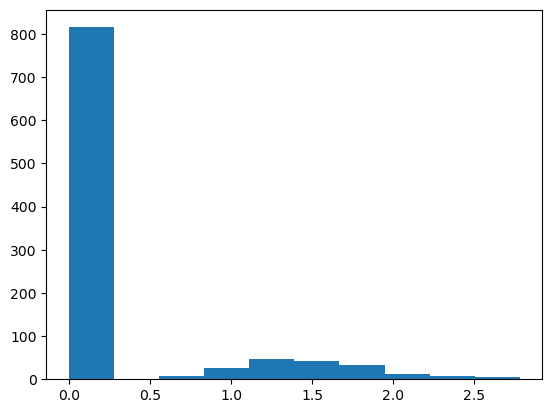

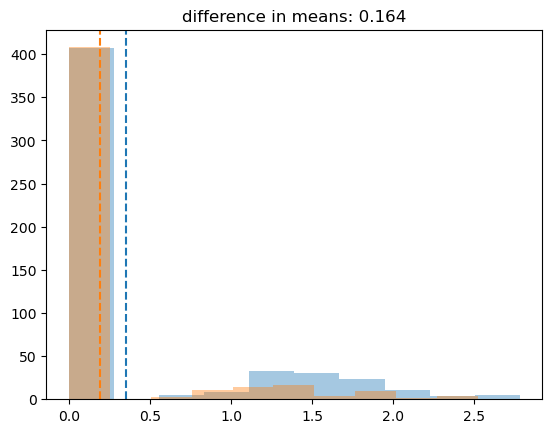

 20%|██        | 20/100 [00:00<00:03, 22.61it/s]

diff pvalue: 0.21501490719037672
equiv pvalue: 8.556545426223863e-35
diff pvalue: 0.6083095682653209
equiv pvalue: 1.0043851353496958e-24
diff pvalue: 0.3690652907473938
equiv pvalue: 2.0574804619904039e-07
diff pvalue: 0.07206145024053959
equiv pvalue: 8.454111496481264e-24
diff pvalue: 0.4674421665418885
equiv pvalue: 7.334080401562965e-27
diff pvalue: 0.07096077239648767
equiv pvalue: 5.815349169467136e-20
diff pvalue: 0.6427527095699064
equiv pvalue: 1.6074604376223868e-31
diff pvalue: 0.9524465366544955
equiv pvalue: 1.0125815040699091e-12
diff pvalue: 0.26395879720575915
equiv pvalue: 6.913966403573463e-32
diff pvalue: 0.6019249976722969
equiv pvalue: 7.567104724475998e-11
diff pvalue: 0.21882235324771282
equiv pvalue: 1.522862261049562e-38
diff pvalue: 0.5512727578924667
equiv pvalue: 2.8795504274406587e-15
diff pvalue: 0.6614579990736067
equiv pvalue: 4.391430794879e-18
diff pvalue: 0.24187451279899205
equiv pvalue: 7.297915320931238e-10
diff pvalue: 0.9134237874870105
equiv pv

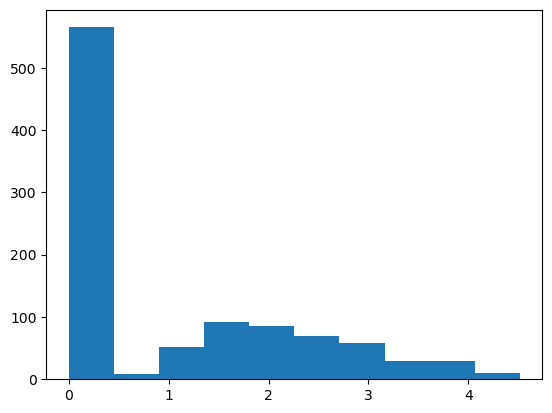

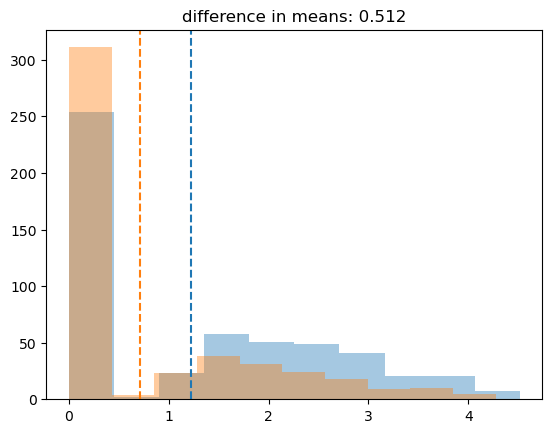

 40%|████      | 40/100 [00:01<00:01, 34.79it/s]

diff pvalue: 0.6654574940272847
equiv pvalue: 0.00022831427456843138
diff pvalue: 0.553763821482422
equiv pvalue: 2.583806947722779e-08
diff pvalue: 0.7016342151916802
equiv pvalue: 7.196991736908485e-32
diff pvalue: 0.48206242436641056
equiv pvalue: 6.25834783459254e-15
diff pvalue: 0.9587691498102484
equiv pvalue: 7.889017022301692e-44
diff pvalue: 0.893475705156512
equiv pvalue: 5.093388010756978e-16
diff pvalue: 0.24823661021418755
equiv pvalue: 3.4884614555025256e-09
diff pvalue: 0.4347034231526673
equiv pvalue: 7.5844850969539515e-19
diff pvalue: 0.011721103396702884
equiv pvalue: 0.000227090545852637
PSMF1


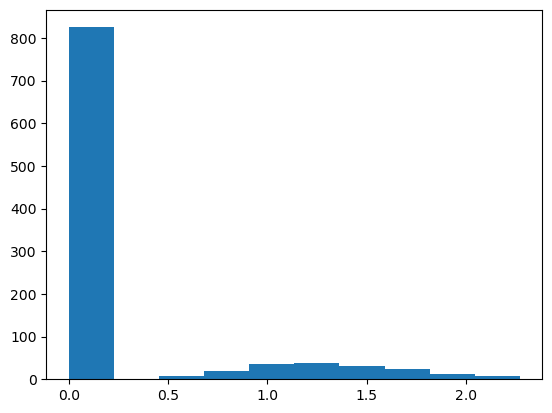

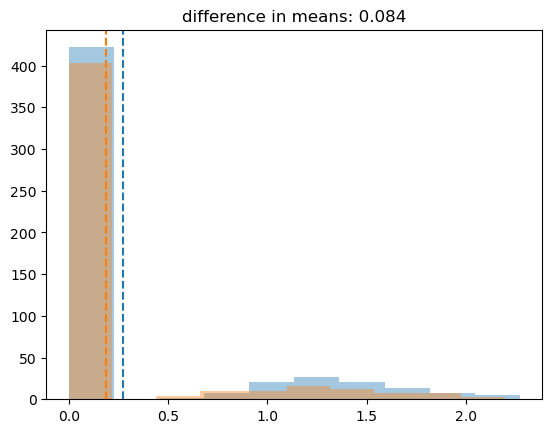

 49%|████▉     | 49/100 [00:01<00:01, 31.28it/s]

diff pvalue: 0.07931691077082105
equiv pvalue: 5.896070873308051e-23
diff pvalue: 0.856756696297535
equiv pvalue: 1.8292923534659797e-18
diff pvalue: 0.3000778439947239
equiv pvalue: 3.470981375322735e-16
diff pvalue: 0.9832927213083003
equiv pvalue: 2.678297974061014e-15
diff pvalue: 0.04056149527294551
equiv pvalue: 5.442675755026768e-15
CASP3


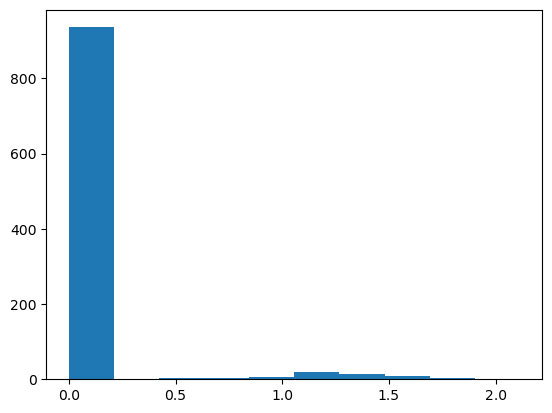

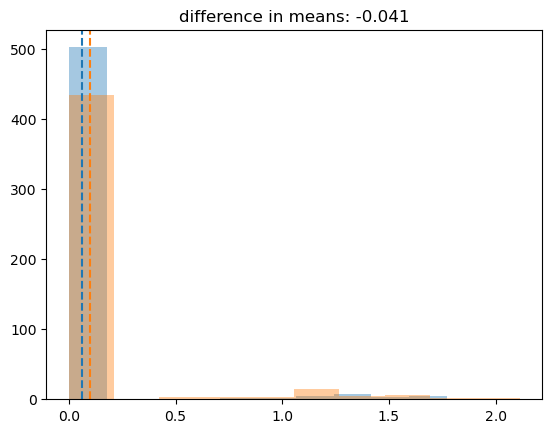

 54%|█████▍    | 54/100 [00:02<00:01, 26.29it/s]

diff pvalue: 0.2989181032313499
equiv pvalue: 6.882180395472153e-15
diff pvalue: 0.22111538341017695
equiv pvalue: 0.00017986224460835208
diff pvalue: 0.4247648056021247
equiv pvalue: 2.0440605161553654e-36
diff pvalue: 0.7072252927772507
equiv pvalue: 5.088265462553678e-22
diff pvalue: 0.02077367775382255
equiv pvalue: 0.0006649538085431248
ERGIC3


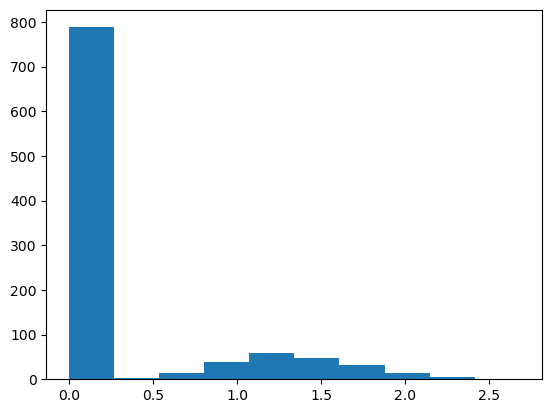

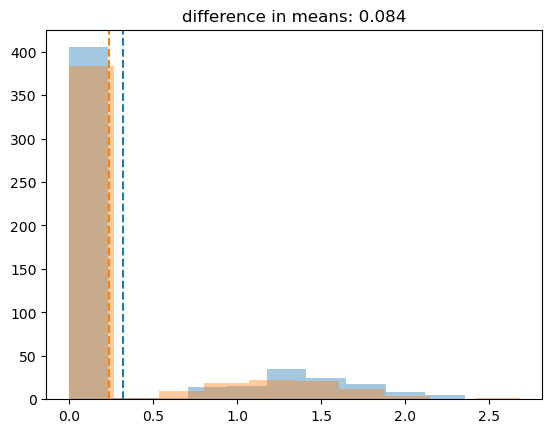

 59%|█████▉    | 59/100 [00:02<00:02, 20.40it/s]

diff pvalue: 0.5401820123056792
equiv pvalue: 3.6725500610691175e-12
diff pvalue: 0.8380755594135385
equiv pvalue: 0.00010866934454071471
diff pvalue: 0.5185233052238314
equiv pvalue: 3.7139791592894805e-25
diff pvalue: 0.028681538593837323
equiv pvalue: 0.15365832168250498
TMA7


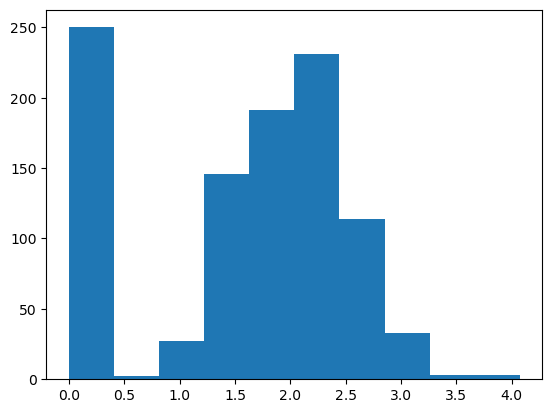

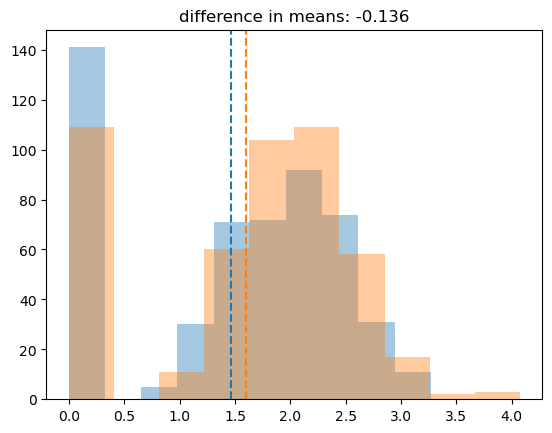

 63%|██████▎   | 63/100 [00:02<00:02, 17.48it/s]

diff pvalue: 0.4803316479653199
equiv pvalue: 3.1546320895280846e-05
diff pvalue: 0.4311960352745683
equiv pvalue: 3.6387153952019513e-37
diff pvalue: 0.6340761573700249
equiv pvalue: 5.030741816876804e-37
diff pvalue: 0.07934567476343152
equiv pvalue: 1.6278167612992398e-34
diff pvalue: 0.09008670988104307
equiv pvalue: 6.737855935526282e-32
diff pvalue: 0.22342075460998198
equiv pvalue: 0.0026494290122526694
diff pvalue: 0.24437476994535073
equiv pvalue: 3.652406969303412e-27
diff pvalue: 0.35018058972885946
equiv pvalue: 6.671879928959598e-22
diff pvalue: 0.0003238684114168633
equiv pvalue: 1.2643279237926025e-10
DUSP22


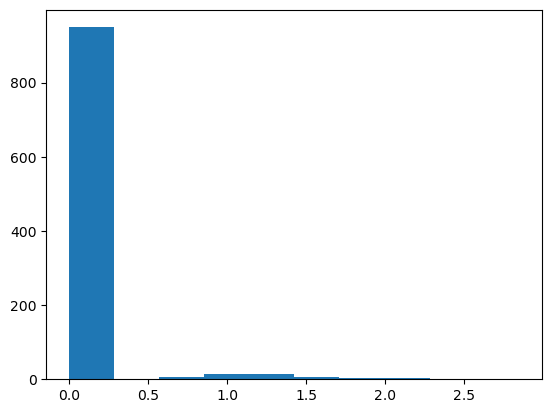

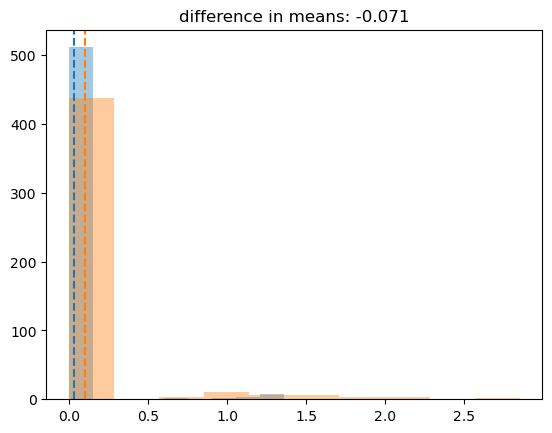

 72%|███████▏  | 72/100 [00:03<00:01, 20.05it/s]

diff pvalue: 0.0029622460790309584
equiv pvalue: 0.33219661269921796
RPS27


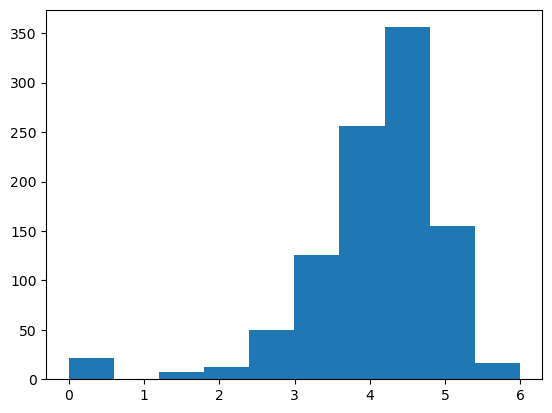

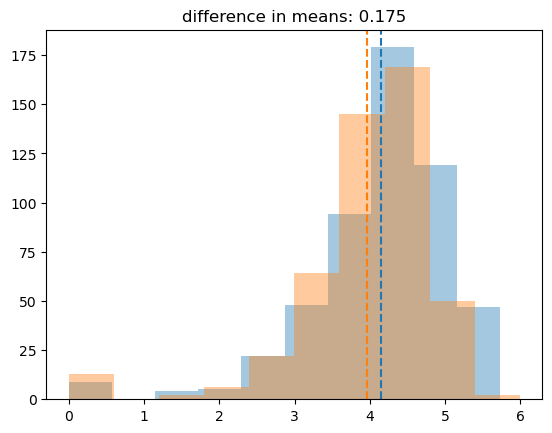

diff pvalue: 0.00010459849726640862
equiv pvalue: 0.6047977347651119
RPL10


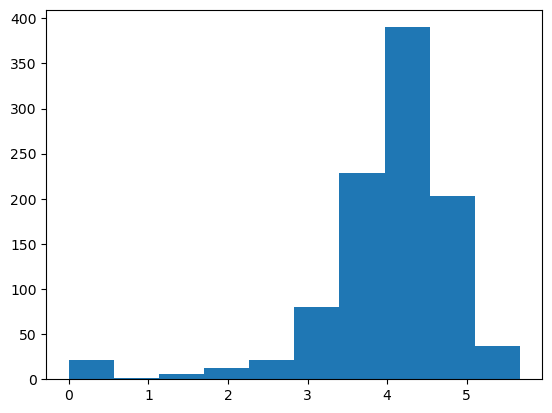

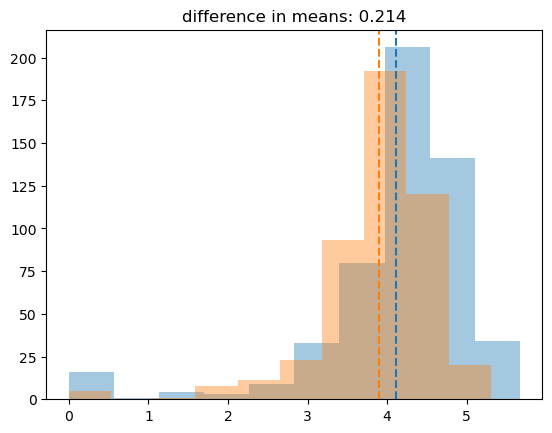

diff pvalue: 0.0013877493972498155
equiv pvalue: 0.522055721541086
ALOX5AP


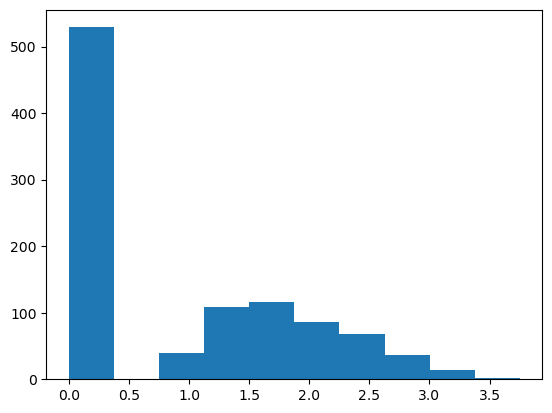

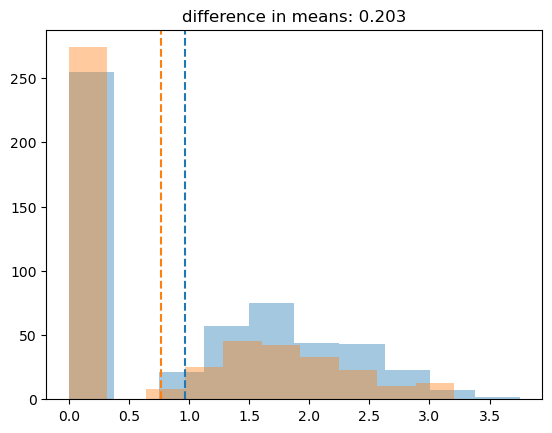

 75%|███████▌  | 75/100 [00:04<00:02, 10.47it/s]

diff pvalue: 0.7787695678524542
equiv pvalue: 3.036642325690909e-23
diff pvalue: 0.0080537366411539
equiv pvalue: 6.074287923504734e-07
NFU1


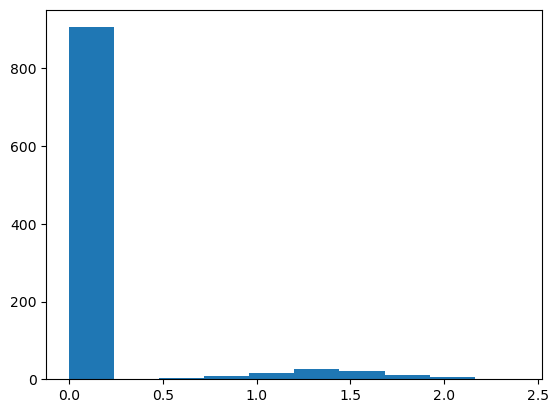

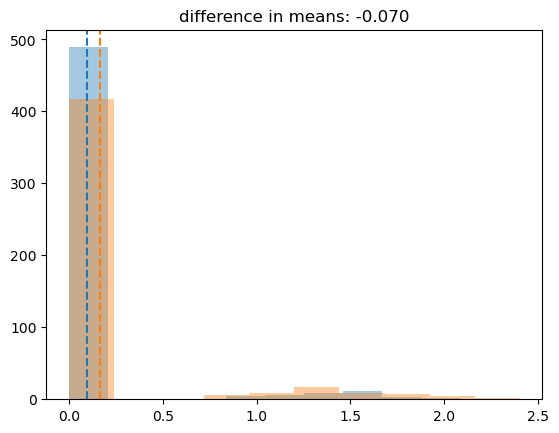

 77%|███████▋  | 77/100 [00:04<00:02,  9.61it/s]

diff pvalue: 0.4539445492362105
equiv pvalue: 4.270933651641999e-19
diff pvalue: 1.9722004658183543e-05
equiv pvalue: 3.7378573177588264e-07
ADAM19


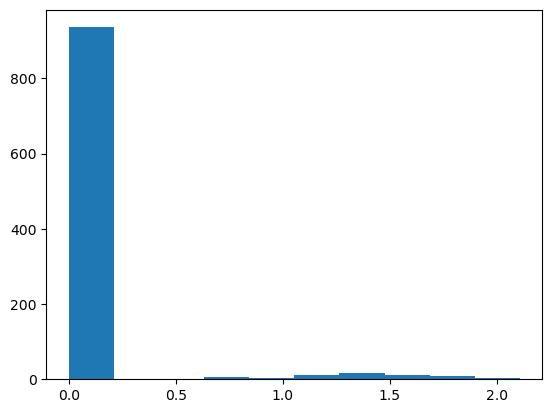

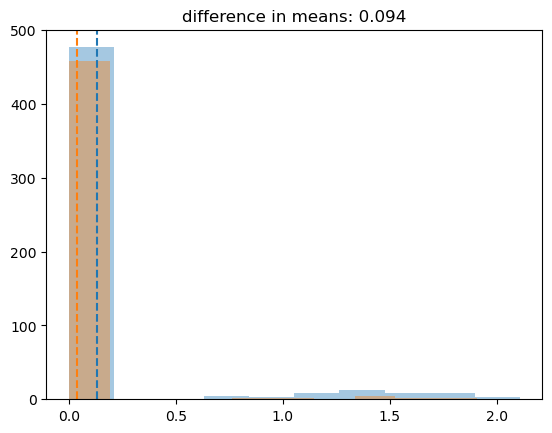

 79%|███████▉  | 79/100 [00:04<00:02,  8.90it/s]

diff pvalue: 0.0885026792492101
equiv pvalue: 0.008780125910884272
diff pvalue: 0.06594035407303314
equiv pvalue: 1.5171739646681464e-12
diff pvalue: 0.09866381557396509
equiv pvalue: 1.942021627196433e-36
diff pvalue: 0.17818918392829414
equiv pvalue: 1.262763794812686e-21
diff pvalue: 0.17345553481620213
equiv pvalue: 9.960385446463422e-09
diff pvalue: 4.199328402004869e-35
equiv pvalue: 1.0
CD8A


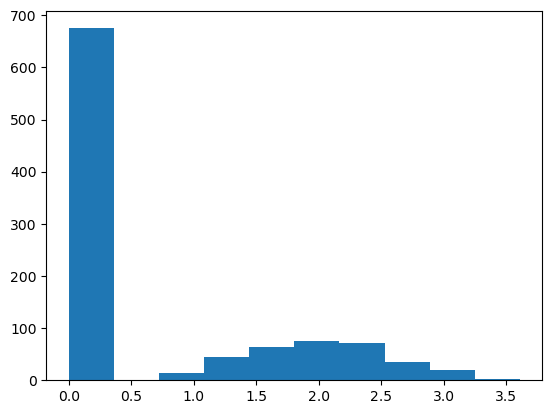

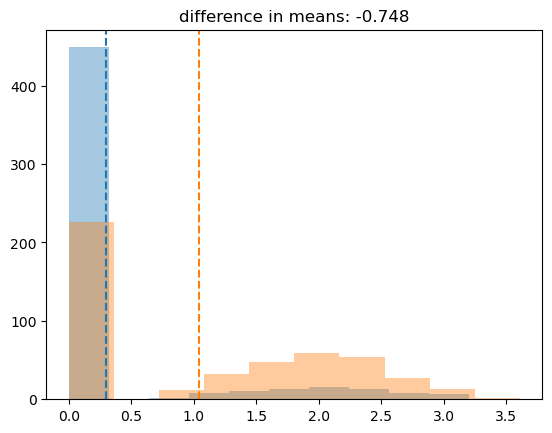

 85%|████████▌ | 85/100 [00:05<00:01, 10.20it/s]

diff pvalue: 0.08855795692085683
equiv pvalue: 5.448319956164298e-09
diff pvalue: 0.6653116188086184
equiv pvalue: 4.598935384877671e-13
diff pvalue: 0.565980909877297
equiv pvalue: 6.399649716385803e-44
diff pvalue: 0.262346844838498
equiv pvalue: 1.4160781065166135e-34
diff pvalue: 0.46897283222050157
equiv pvalue: 0.0647879618154054
RPS17


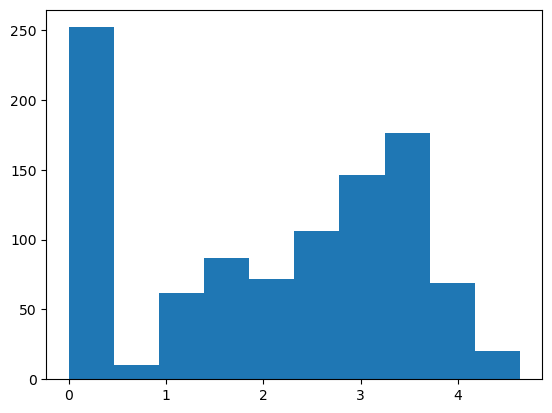

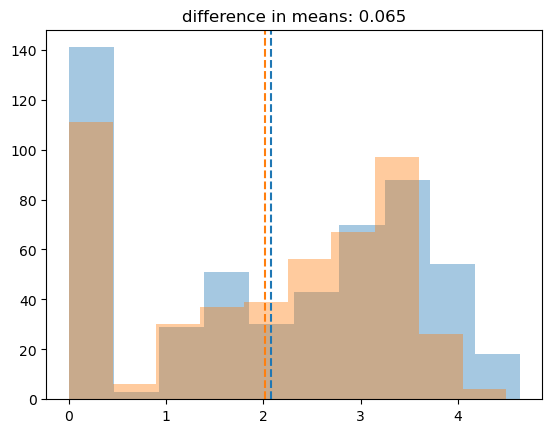

 90%|█████████ | 90/100 [00:05<00:00, 11.37it/s]

diff pvalue: 0.4731825410108864
equiv pvalue: 1.3658765430256278e-22
diff pvalue: 0.384758268584232
equiv pvalue: 2.499064585355038e-33
diff pvalue: 0.05617330221419176
equiv pvalue: 3.960188979948443e-27
diff pvalue: 0.711945170439555
equiv pvalue: 2.986483417683227e-12
diff pvalue: 0.47453371572492764
equiv pvalue: 4.09699055491045e-21
diff pvalue: 5.731989036298127e-06
equiv pvalue: 0.0022876858864025974
NFKB2


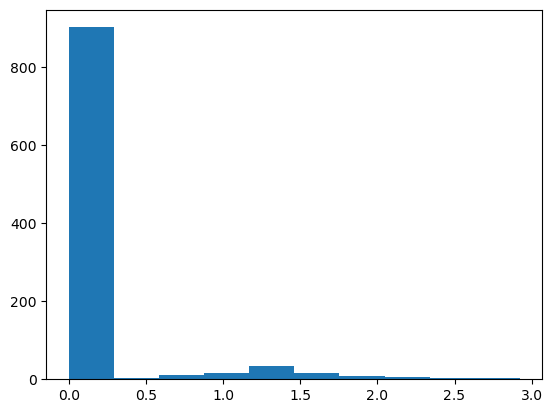

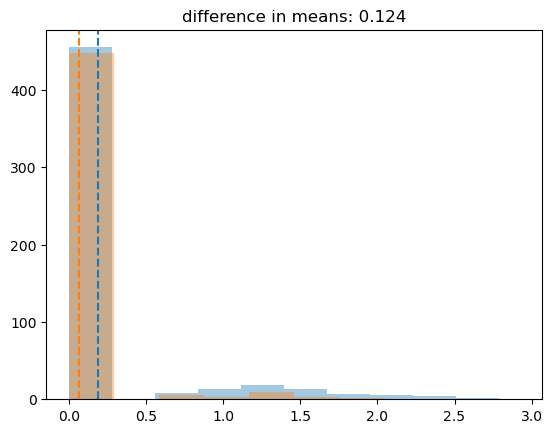

 96%|█████████▌| 96/100 [00:06<00:00, 13.00it/s]

diff pvalue: 3.704208292756591e-24
equiv pvalue: 0.9999905886679682
PLEK


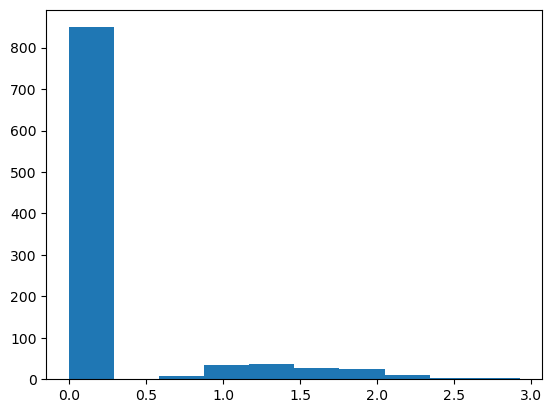

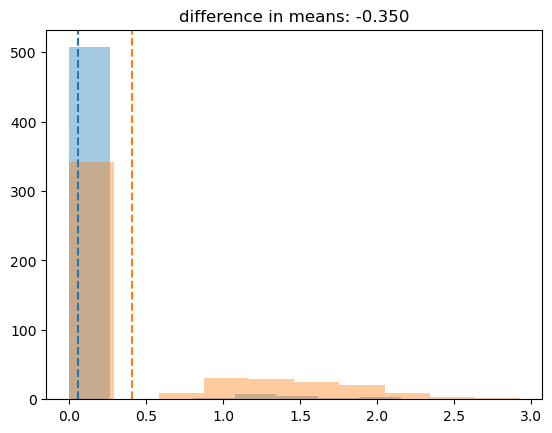

100%|██████████| 100/100 [00:06<00:00, 15.68it/s]

diff pvalue: 0.5801130715777412
equiv pvalue: 2.0204395029015154e-29
diff pvalue: 0.3802804774995754
equiv pvalue: 3.8882959637162426e-29
diff pvalue: 0.5779959019367472
equiv pvalue: 8.805586204636299e-12


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [74]:
delta = 0.2

grouped_df = df.groupby("cell_type")

out = {"gene" : [], "nnz_group1" : [], "nnz_group2" : [], "avg_group1" : [], 
       "avg_group2" : [], "diff_pval" : [], "equiv_pval" : []}

count = 0
for gene in tqdm.tqdm([x for x in df.columns if x != "cell_type"]):
#     count += 1
#     if count == 5:
#         break

    samples = grouped_df[gene].apply(list)
    diff_pval, equiv_pval = perform_t_tests(samples[0], samples[1], delta)
    if (diff_pval < 0.05) or (equiv_pval > 0.05):
        print(gene)
        plt.hist(df[gene])
        plt.show()
        plot_groups(samples[0], samples[1])
    out["gene"].append(gene)
    out["nnz_group1"].append(np.count_nonzero(samples[0]))
    out["nnz_group2"].append(np.count_nonzero(samples[1]))
    out["avg_group1"].append(np.mean(samples[0]))
    out["avg_group2"].append(np.mean(samples[1]))
    out["diff_pval"].append(diff_pval)
    out["equiv_pval"].append(equiv_pval)

out_df = pd.DataFrame.from_dict(out)
for pval in ["diff", "equiv"]:
    out_df["{}_pval_adj".format(pval)] = multitest.multipletests(out_df["{}_pval".format(pval)], method="fdr_bh")[1]
    out_df["sig_{}".format(pval)] = False
    out_df.loc[out_df["{}_pval_adj".format(pval)] < 0.05, "sig_{}".format(pval)] = True
    
out_df["sig_both"] = out_df["sig_diff"] & out_df["sig_equiv"]

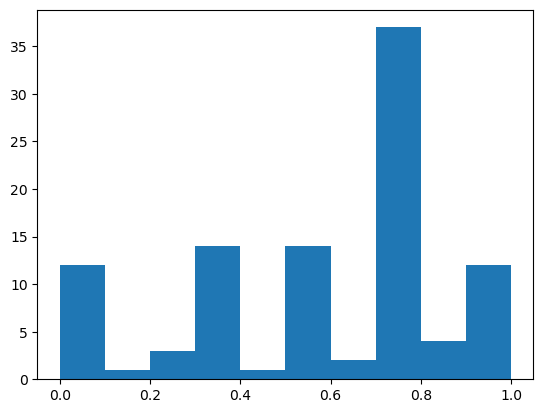

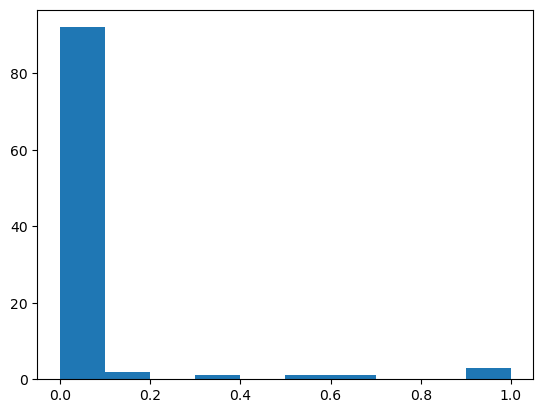

In [72]:
plt.hist(out_df["diff_pval_adj"])
plt.show()

plt.hist(out_df["equiv_pval_adj"])
plt.show()

In [80]:
out_df.sort_values("diff_pval_adj")

,gene,nnz_group1,nnz_group2,avg_group1,avg_group2,diff_pval,equiv_pval,diff_pval_adj,sig_diff,equiv_pval_adj,sig_equiv,sig_both
84,CD8A,78,247,0.296943,1.045055,4.199328e-35,1.000000e+00,4.199328e-33,True,1.000000e+00,False,False
96,PLEK,20,131,0.057483,0.407332,3.704208e-24,9.999906e-01,1.852104e-22,True,1.000000e+00,False,False
39,RGS1,273,162,1.225634,0.713235,6.426020e-11,9.999748e-01,2.142007e-09,True,1.000000e+00,False,False
95,NFKB2,72,25,0.191872,0.067383,5.731989e-06,2.287686e-03,1.432997e-04,True,2.599643e-03,True,True
19,PDE4B,120,65,0.354092,0.190121,2.157365e-05,1.701711e-01,3.595608e-04,True,1.810331e-01,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
44,MYO19,12,14,0.032711,0.033424,9.587691e-01,7.889017e-44,9.783359e-01,False,2.629672e-42,True,False
4,NSD2,14,11,0.031487,0.030782,9.572966e-01,1.129586e-46,9.783359e-01,False,1.129586e-44,True,False
0,CERS4,21,19,0.047120,0.046318,9.581136e-01,2.386603e-36,9.783359e-01,False,2.386603e-35,True,False
52,YDJC,46,48,0.122234,0.121705,9.832927e-01,2.678298e-15,9.932250e-01,False,5.698506e-15,True,False


In [90]:
sub = out_df[(out_df["diff_pval"] == False) & (out_df["equiv_pval"] == False)]


In [94]:
out_df[out_df["diff_pval"] == False]

,gene,nnz_group1,nnz_group2,avg_group1,avg_group2,diff_pval,equiv_pval,diff_pval_adj,sig_diff,equiv_pval_adj,sig_equiv,sig_both


In [96]:
(out_df["diff_pval"] == False).value_counts()

False    100
Name: diff_pval, dtype: int64

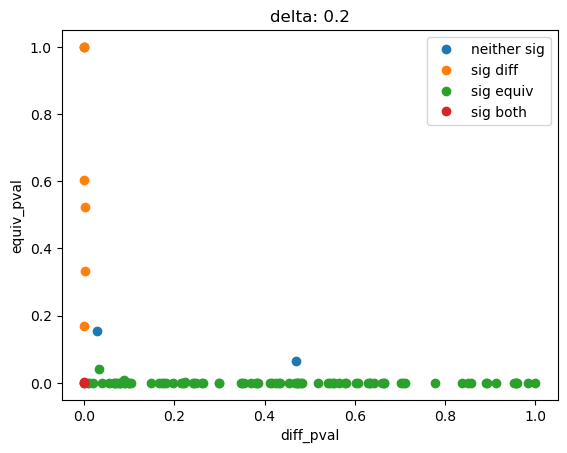

In [99]:

sub = out_df[(out_df["sig_diff"] == False) & (out_df["sig_equiv"] == False)]
plt.plot(sub["diff_pval"], sub["equiv_pval"],marker="o",linestyle="", label = "neither sig")

sub = out_df[(out_df["sig_diff"] == True) & (out_df["sig_equiv"] == False)]
plt.plot(sub["diff_pval"], sub["equiv_pval"],marker="o",linestyle="", label = "sig diff")

sub = out_df[(out_df["sig_diff"] == False) & (out_df["sig_equiv"] == True)]
plt.plot(sub["diff_pval"], sub["equiv_pval"],marker="o",linestyle="", label = "sig equiv")

sub = out_df[(out_df["sig_diff"] == True) & (out_df["sig_equiv"] == True)]
plt.plot(sub["diff_pval"], sub["equiv_pval"],marker="o",linestyle="", label = "sig both")

plt.xlabel("diff_pval")
plt.ylabel("equiv_pval")
plt.title("delta: {}".format(delta))
plt.legend()
plt.show()

In [20]:
test_df.groupby("cell_type")[gene].apply(list)

cell_type
CD4-positive, alpha-beta T cell    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
CD8-positive, alpha-beta T cell    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: CERS4, dtype: object

In [22]:
grouped_df = df.groupby("cell_type")


cell_type
CD4-positive, alpha-beta T cell    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
CD8-positive, alpha-beta T cell    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: CERS4, dtype: object

In [41]:
np.mean(samples[0])

0.04693597917086259